In [1]:
import pandas as pd              #import pandas library with aliasname as pd
delivery_t = pd.read_csv("C:/Users/Anjali/OneDrive/Desktop/data science/delivery_time.csv")  # read data
delivery_t.head()      #top elements

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
delivery_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
delivery_t.corr()   #correlation

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


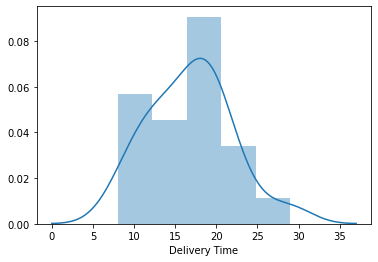

In [4]:
import seaborn as sns                  #y variable
sns.distplot(delivery_t['Delivery Time'])

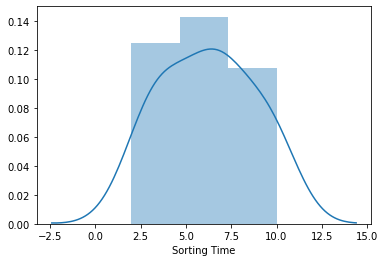

In [5]:
import seaborn as sns                  #x variable
sns.distplot(delivery_t['Sorting Time'])

In [8]:
#renaming columns
delivery_t = delivery_t.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
delivery_t

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
import statsmodels.formula.api as smf                       #Fitting a Linear Regression Model.
model = smf.ols("delivery_time~sorting_time",data = delivery_t).fit()

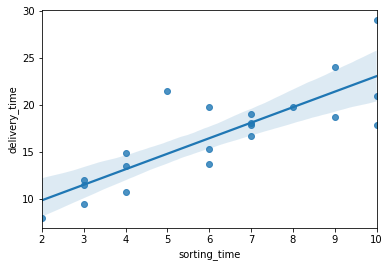

In [11]:
sns.regplot(x="sorting_time",y="delivery_time",data=delivery_t)

In [13]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [16]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([30.33,15])

In [17]:
delivery_t=pd.DataFrame(newdata,columns=['sorting_time'])

In [18]:
model.predict(delivery_t)

0    56.597507
1    31.318032
dtype: float64